## **SPAM & HAM CLASSIFICATION**
`Using MNB and KNN algorithm`





#### **Problem Statement:**
> *To classify the given email or SMS message as spam or ham using the relevant dataset and compare the two machine learning algorithms i.e. Multinomial Naive Bayes (MNB) and K-Nearest Neighbor (KNN) algorithm for the same.*

---

#### **Introduction:**
This project aims to demonstarate the classify the given email or SMS message as ham or spam. This is achieved by using the KNN and MNB algorithm. Various pre-processing and optimisation techniques are implemented to achieve the desired results.
#### **Data Source:**
 The data source for the model has been taken from _Kaggle_. It is raw data which is processed in the code given below to fit the model. The dataset used to predict spam Emails and spam SMS using the ML algorithms are below:

*  Spam Emails Dataset: It contains the text of `50379 email` messages and a label, classifying the message as "spam" or "ham". It has 29% of messages as spam while 71% of the messages are ham (_https://www.kaggle.com/venky73/spam-mails-dataset_) 
*  Spam SMS Dataset: It contains the text of `5572 SMS` messages and a label, classifying the message as "spam" or "ham". It has 13% of messages as spam while 87% of the messages are ham (_https://www.kaggle.com/uciml/sms-spam-collection-dataset_)




In [ ]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

import os

from yellowbrick.text import TSNEVisualizer

In [ ]:
def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", cbar=False, ax=ax)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [ ]:
# data = pd.read_csv("/spam_ham_dataset.csv",encoding='latin-1')
data = pd.read_csv("/spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# data = data.drop(["Unnamed: 0", "label_num"], axis=1)

data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

data.head(5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
data.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [ ]:
print(data.shape)
counts = data.label.value_counts()
counts

(5572, 2)


ham     4825
spam     747
Name: label, dtype: int64

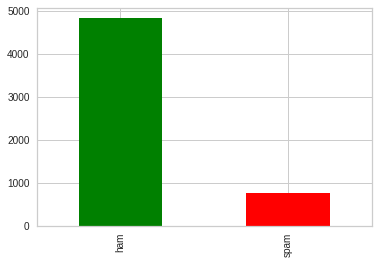

In [ ]:
counts.plot.bar(color=['green', 'red'])

In [ ]:
data['spam'] = data['label'].map({'spam': 1, 'ham': 0})
data.head(6)

,label,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1


In [ ]:
data['length'] = data['text'].apply(len)
data.head(6)

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148


(-40.0, 950.0, 0.0, 118.65)

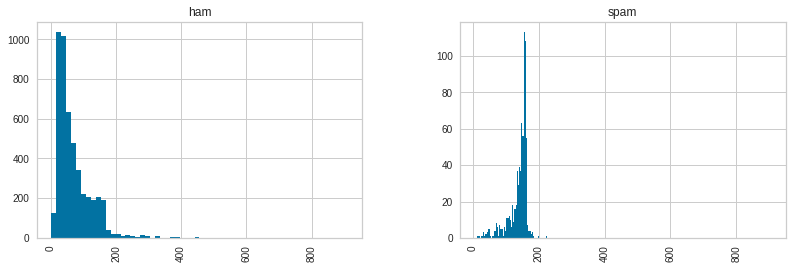

In [ ]:
data.hist(column='length',by='label',bins=60,figsize=(13,4))
# plt.axis(xmin=-1000,xmax=30000)

plt.axis(xmin=-40,xmax=950)

Hence, the ham messages are relatively shorter than the spam messages. It can be seen that most of the ham messages lie in the range of `0 to 100` whereas the spam messages lie in between `100 to 200`

In [ ]:
data_ham  = data[data['spam'] == 0].copy()
data_spam = data[data['spam'] == 1].copy()
data_ham.head(5)

,label,text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
6,ham,Even my brother is not like to speak with me. ...,0,77


In [ ]:
 data_spam.head(5)

,label,text,spam,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1,136


In [ ]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=1000, height=500).generate(text)
    
    plt.figure(figsize=(8,10), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=15 )
    plt.show()

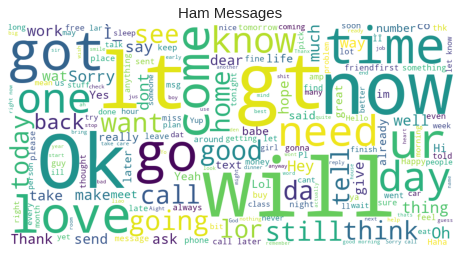

In [ ]:
show_wordcloud(data_ham, "Ham Messages")

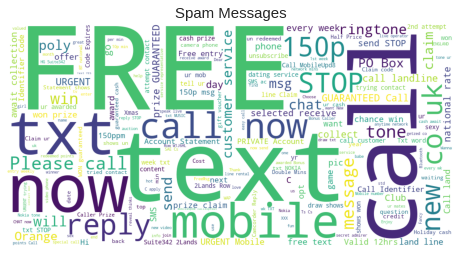

In [ ]:
show_wordcloud(data_spam, "Spam Messages")

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")[100:105]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['here', 'there', 'when', 'where', 'why']

In [ ]:
def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords

In [ ]:
data['text'].apply(remove_punctuation_and_stopwords).head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: text, dtype: object

In [ ]:
data_ham.loc[:, 'text'] = data_ham['text'].apply(remove_punctuation_and_stopwords)
words_data_ham = data_ham['text'].tolist()
data_spam.loc[:, 'text'] = data_spam['text'].apply(remove_punctuation_and_stopwords)
words_data_spam = data_spam['text'].tolist()

In [ ]:
list_ham_words = []
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [ ]:
list_spam_words = []
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [ ]:
from collections import Counter

In [ ]:
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)
df_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

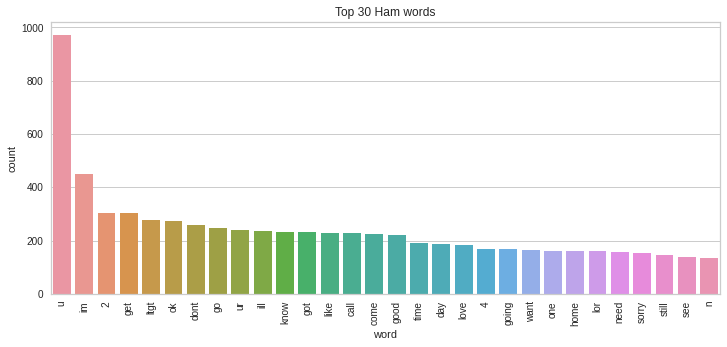

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='word', y='count', data=df_hamwords_top30, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

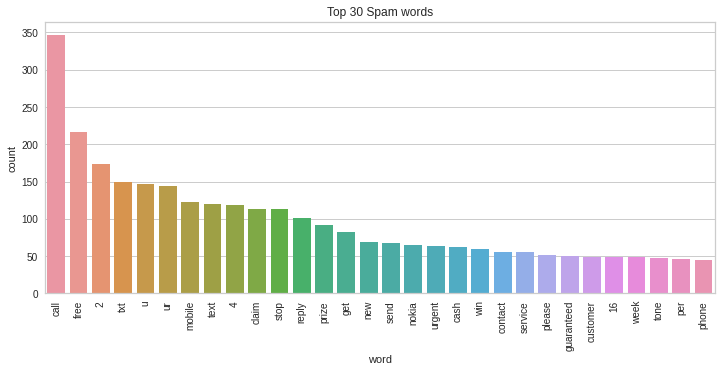

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='word', y='count', data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

In [ ]:
fdist_ham  = nltk.FreqDist(list_ham_words)
fdist_spam = nltk.FreqDist(list_spam_words)

In [ ]:
df_hamwords_top30_nltk  = pd.DataFrame(fdist_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30_nltk = pd.DataFrame(fdist_spam.most_common(30), columns=['word', 'count'])

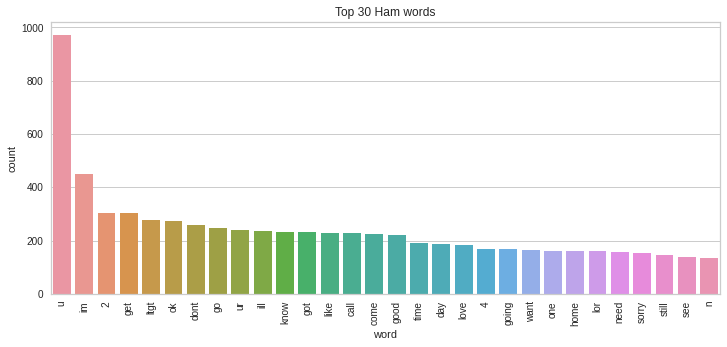

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='word', y='count', data=df_hamwords_top30_nltk, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

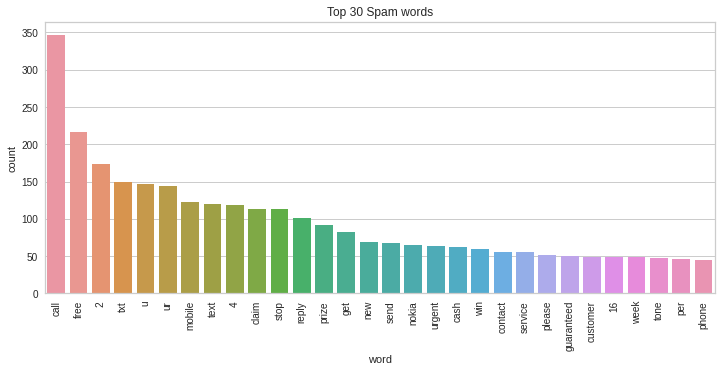

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='word', y='count', data=df_spamwords_top30_nltk, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(data['text'])
print(len(bow_transformer.vocabulary_))

9431


In [ ]:
sample_spam = data['text'][6]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)
print(bow_sample_spam.shape)

Even my brother is not like to speak with me. They treat me like aids patent.
  (0, 1062)	1
  (0, 1807)	1
  (0, 3170)	1
  (0, 4954)	2
  (0, 6171)	1
  (0, 7639)	1
  (0, 8444)	1
(1, 9431)


In [ ]:
rows, cols = bow_sample_spam.nonzero()
for col in cols: 
    print(bow_transformer.get_feature_names()[col])

print("Shape of Spam bow_spam: ", np.shape(bow_sample_spam))

aids
brother
even
like
patent
speak
treat
Shape of Spam bow_spam:  (1, 9431)


In [ ]:
sample_ham = data['text'][2]
bow_sample_ham = bow_transformer.transform([sample_ham])
print(sample_ham)
print(bow_sample_ham)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
  (0, 72)	1
  (0, 415)	1
  (0, 422)	1
  (0, 435)	1
  (0, 838)	1
  (0, 1228)	1
  (0, 2294)	1
  (0, 2518)	1
  (0, 3123)	2
  (0, 3261)	2
  (0, 3385)	1
  (0, 3539)	1
  (0, 5287)	1
  (0, 6665)	1
  (0, 6718)	1
  (0, 6774)	1
  (0, 8150)	1
  (0, 8311)	1
  (0, 8518)	1
  (0, 9017)	1
  (0, 9059)	1


In [ ]:
bow_data = bow_transformer.transform(data['text'])
bow_data.shape

(5572, 9431)

In [ ]:
bow_data.nnz

49772

In [ ]:
bow_data

<5572x9431 sparse matrix of type '<class 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [ ]:
bow_data.shape[0]

5572

In [ ]:
bow_data.shape[1]

9431

In [ ]:
bow_data.nnz

49772

In [ ]:
print( bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]) *100 )

0.09471444959776236


Around 10% of the matrix are non zeros (i.e. ones)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bow_data)
tfidf_sample_ham = tfidf_transformer.transform(bow_sample_ham)
print(tfidf_sample_ham)

  (0, 9059)	0.18807890505452227
  (0, 9017)	0.14698492929250848
  (0, 8518)	0.12458400696633347
  (0, 8311)	0.21794831695706857
  (0, 8150)	0.12191306977871309
  (0, 6774)	0.16504230783355564
  (0, 6718)	0.23183680257116945
  (0, 6665)	0.23183680257116945
  (0, 5287)	0.15820949315197594
  (0, 3539)	0.11445159563532871
  (0, 3385)	0.1816518935838057
  (0, 3261)	0.4636736051423389
  (0, 3123)	0.35533198564645746
  (0, 2518)	0.20196739066862318
  (0, 2294)	0.19414580118917368
  (0, 1228)	0.1674787110187263
  (0, 838)	0.21794831695706857
  (0, 435)	0.22401521309172
  (0, 422)	0.22401521309172
  (0, 415)	0.0993576941536962
  (0, 72)	0.23183680257116945


In [ ]:
tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam)
print(tfidf_sample_spam)

  (0, 8444)	0.34472764721169796
  (0, 7639)	0.30954945647505844
  (0, 6171)	0.45333900393348947
  (0, 4954)	0.4263867583493029
  (0, 3170)	0.2815764554441113
  (0, 1807)	0.33647958379814025
  (0, 1062)	0.45333900393348947


In [ ]:
data_tfidf = tfidf_transformer.transform(bow_data)
data_tfidf

<5572x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [ ]:
np.shape(data_tfidf)

(5572, 9431)

In [ ]:
from sklearn.model_selection import train_test_split

data_tfidf_train, data_tfidf_test, label_train, label_test = \
    train_test_split(data_tfidf, data["spam"], test_size=0.3, random_state=5)

In [ ]:
data_tfidf_train

<3900x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 35125 stored elements in Compressed Sparse Row format>

In [ ]:
data_tfidf_test

<1672x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 14647 stored elements in Compressed Sparse Row format>

In [ ]:
from scipy.sparse import  hstack
X2 = hstack((data_tfidf ,np.array(data['length'])[:,None])).A

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, data["spam"], test_size=0.3, random_state=5)

Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       1.00      0.72      0.84       207

    accuracy                           0.97      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.97      0.96      1672

Accuracy : 0.965311004784689
None
None


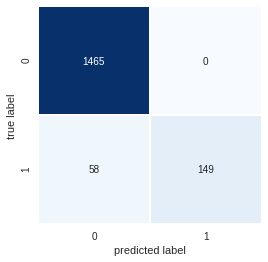

In [ ]:
data_tfidf_train = data_tfidf_train.A
data_tfidf_test = data_tfidf_test.A

spam_detect_model = MultinomialNB().fit(data_tfidf_train, label_train)

pred_test_MNB = spam_detect_model.predict(data_tfidf_test)

print(print_validation_report(label_test, pred_test_MNB))
print(plot_confusion_matrix(label_test, pred_test_MNB))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1465
           1       0.97      0.88      0.93       207

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Accuracy : 0.9826555023923444
None
None


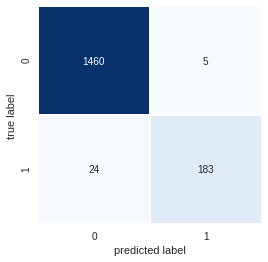

In [ ]:
scaler = MinMaxScaler()
data_tfidf_train_sc = scaler.fit_transform(data_tfidf_train)
data_tfidf_test_sc  = scaler.transform(data_tfidf_test)

spam_detect_model_minmax = MultinomialNB().fit(data_tfidf_train_sc, label_train)
pred_test_MNB = spam_detect_model_minmax.predict(data_tfidf_test_sc)

print(print_validation_report(label_test, pred_test_MNB))
print(plot_confusion_matrix(label_test, pred_test_MNB))

Classification Report
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1465
           1       0.00      0.00      0.00       207

    accuracy                           0.88      1672
   macro avg       0.44      0.50      0.47      1672
weighted avg       0.77      0.88      0.82      1672

Accuracy : 0.8761961722488039
None
None


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


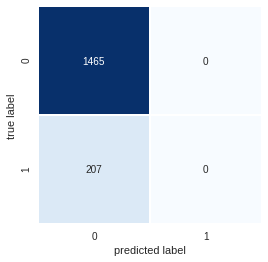

In [ ]:
spam_detect_model_2 = MultinomialNB().fit(X2_train, y2_train)
pred_test_MNB_2 = spam_detect_model_2.predict(X2_test)

print(print_validation_report(y2_test, pred_test_MNB_2))
print(plot_confusion_matrix(y2_test, pred_test_MNB_2))

In [ ]:
X2_tfidf_train = X2_train[:,0:9431]
X2_tfidf_test  = X2_test[:,0:9431]
X2_length_train = X2_train[:,9431]
X2_length_test  = X2_test[:,9431]

# X2_tfidf_train = X2_train[:,0:50379]
# X2_tfidf_test  = X2_test[:,0:50379]
# X2_length_train = X2_train[:,50379]
# X2_length_test  = X2_test[:,50379]

scaler = MinMaxScaler()
X2_tfidf_train = scaler.fit_transform(X2_tfidf_train)
X2_tfidf_test  = scaler.transform(X2_tfidf_test)

scaler = MinMaxScaler()
X2_length_train = scaler.fit_transform(X2_length_train.reshape(-1, 1))
X2_length_test  = scaler.transform(X2_length_test.reshape(-1, 1))

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1465
           1       0.97      0.88      0.93       207

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Accuracy : 0.9826555023923444
None
None


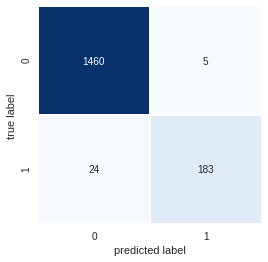

In [ ]:
X2_train = np.hstack((X2_tfidf_train, X2_length_train))
X2_test  = np.hstack((X2_tfidf_test,  X2_length_test))

spam_detect_model_3 = MultinomialNB().fit(X2_train, y2_train)
pred_test_MNB_3 = spam_detect_model_3.predict(X2_test)

print(print_validation_report(y2_test, pred_test_MNB_3))
print(plot_confusion_matrix(y2_test, pred_test_MNB_3))

In [ ]:
parameters_KNN = {'n_neighbors': (10,15,17) }

grid_KNN = GridSearchCV( KNeighborsClassifier(), parameters_KNN, cv=5, n_jobs=-1, verbose=1)

grid_KNN.fit(data_tfidf_train, label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': (10, 15, 17)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=1)

In [ ]:
print(grid_KNN.best_params_)
print(grid_KNN.best_score_)
print("\nBest Classifier according to GridSearchCV is: \n")
print(grid_KNN.best_estimator_)

{'n_neighbors': 15}
0.9364102564102564

Best Classifier according to GridSearchCV is: 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1465
           1       0.99      0.60      0.75       207

    accuracy                           0.95      1672
   macro avg       0.97      0.80      0.86      1672
weighted avg       0.95      0.95      0.94      1672

Accuracy : 0.9503588516746412
None
None


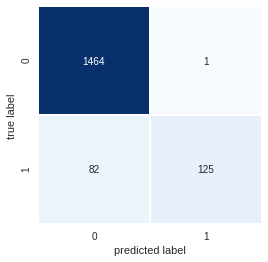

In [ ]:
pred_test_KNN = grid_KNN.predict(data_tfidf_test)

print(print_validation_report(label_test, pred_test_KNN))
print(plot_confusion_matrix(label_test, pred_test_KNN))